In [1]:
%matplotlib inline
%reset
from IPython.display import display

import numpy as np
import matplotlib.pyplot as plt
import scipy

import SchemDraw as schem # to draw schematics (install using 'pip install SchemDraw')
import SchemDraw.elements as e

import skrf as rf # scikit-rf (install using 'conda -c scikit-rf scikit-rf')

import sympy # sympy (install using 'conda -c sympy sympy')
from sympy import I # imaginary symbol

rf.stylely() # enable scikit-rf plot styles
sympy.init_printing(use_latex='mathjax') # print sympy equations in MathJAX (for Jupyter)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
# helper functions
def ll(a, b): # return a and b in parallel (symbolically)
    return (a * b) / (a + b)
def mag2db(mag):
    return np.multiply(20.0, np.log10(mag))
def db2mag(db):
    return np.power(10, np.divide(db, 20.0))

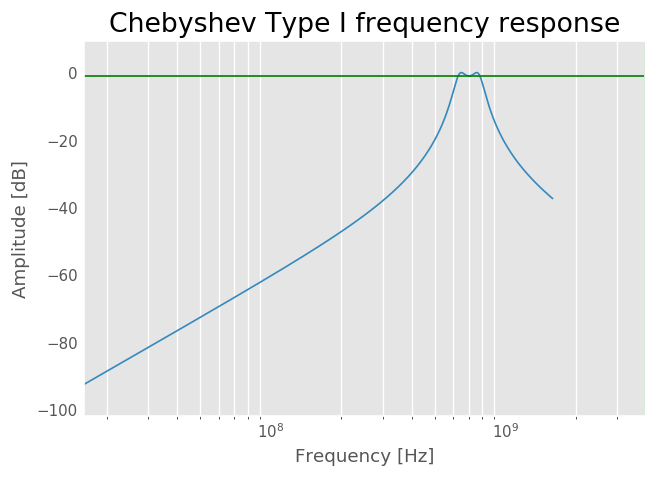

[  8.72820467e+17   0.00000000e+00   0.00000000e+00] [  1.00000000e+00   1.03459023e+09   3.97787095e+19   2.00707343e+28
   3.76348143e+38]


In [30]:
# Design a Chebyshev Type I bandpass filter with the following specifications
# Passband = 630 - 780 Mhz (i.e. center frequency of 705 Mhz and span of 150 Mhz)
# In-band ripple = 1 dB
# 25 dB attenation at 550 Mhz (i.e. 155 Mhz from center frequency)
cheby_b, cheby_a = scipy.signal.cheby1(N=2, rp=1, Wn=(630e6*2*np.pi, 780e6*2*np.pi), btype='bandpass', analog=True, output='ba')

w, h = scipy.signal.freqs(cheby_b, cheby_a, worN=np.logspace(8, 10, 1000))
plt.plot(np.divide(w, 2*np.pi), 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Chebyshev Type I frequency response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(630e6*2*np.pi, color='green') # cutoff frequency
plt.axhline(-1, color='green') # rp
plt.show()
print(cheby_b, cheby_a)

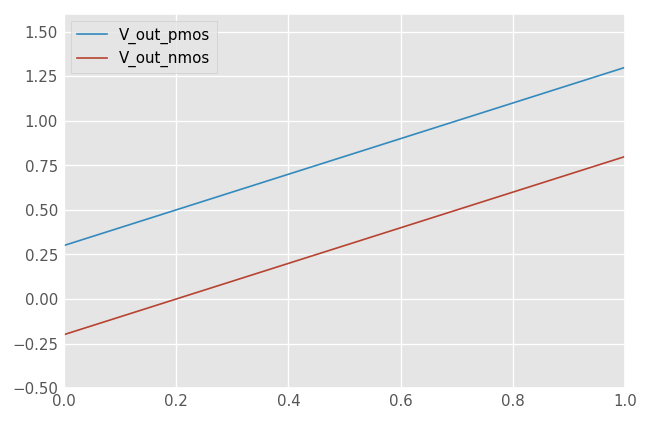

In [31]:
# 151 Problem 3a
Vc = np.linspace(0, 1, 1000)
Vthn = 0.2
Vthp = 0.3
V_out_p_on = np.add(Vc, Vthp)
V_out_n_on = np.multiply(-1, np.subtract(Vthn, Vc))
plt.plot(Vc, V_out_p_on)
plt.plot(Vc, V_out_n_on)
plt.legend(['V_out_pmos', 'V_out_nmos'])

In [50]:
I2, Ia, Ib, Zcpp, Zcfr, V2, V1 = sympy.symbols('I2 Ia Ib Zcpp Zcfr V2 Vx')
equs = []
equs.append(I2 - (Ia + Ib))
equs.append(V2 - (Zcpp * Ia))
equs.append(V1 - (Zcpp * Ib))
equs.append(V1 - (V2 - Zcfr*Ib))
equs.append(V1 - V2 * (Zcfr / (Zcfr + Zcpp)))
sympy.linsolve(equs, V2)

∅